### Block Diagram

- To simulate a model represented as block diagram, the equations need to be represented as a set of first order differential equations

- Also the initial state variable and reference values need to be determined

### Integrator Block

-
             ┌───────┐       
        u -> │ K_I/s │ -> y  
             └───────┘       

- Equation for an integrator with u as an input and y as an output is
$$
\frac{dy}{dt} = K_I u
$$

- In steady-state with an initial output of $y_0$, the initial state is $y_0$ and the initial inpit is zero

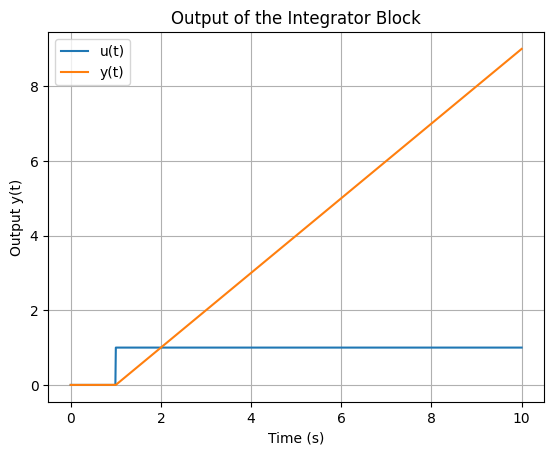

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def solve(integrator_block, t_span, u_func, K_I, t_eval):
    y0 = [K_I * u_func(0)]
    y = solve_ivp(integrator_block, t_span, y0, args=(u_func, K_I), t_eval=t_eval)
    return y

def integrator_block(t, y, u_func, K_I):
    u = u_func(t)
    dydt = K_I * u
    return [dydt]

def u_step(t):
    if t < 1:
        return 0
    else:
        return 1

K_I = 1.0
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

sol = solve(integrator_block, t_span, u_step, K_I, t_eval)

plt.plot(sol.t, [u_step(t) for t in sol.t], label="u(t)")
plt.plot(sol.t, sol.y[0], label="y(t)")
plt.xlabel("Time (s)")
plt.ylabel("Output y(t)")
plt.title("Output of the Integrator Block")
plt.grid(True)
plt.legend()
plt.show()

### First Order Lag Block

-
             ┌────────┐       
             │   K    │       
        u -> │ ────── │ -> y  
             │ 1 + Ts │       
             └────────┘       

- Equation with u as an input and y as an output is
$$
\frac{dy}{dt} = \frac{1}{T} (K u - y)
$$

- In steady-state with an initial output of $y_0$, the initial state is $y_0$ and the initial input is $y_0 / K$

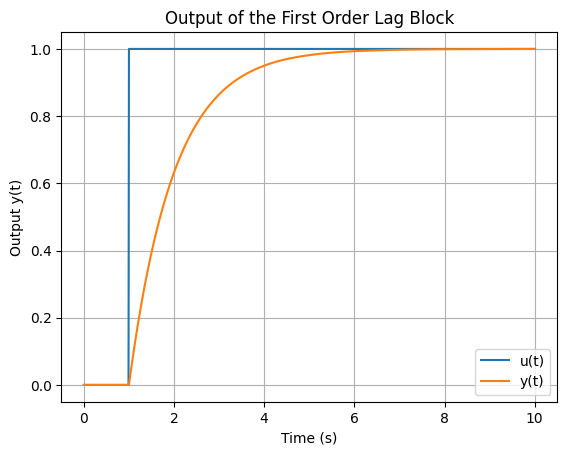

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def solve(first_order_lag_block, t_span, u_func, K, T, t_eval):
    y0 = [K * u_func(0)]
    y = solve_ivp(first_order_lag_block, t_span, y0, args=(u_func, K, T), t_eval=t_eval)
    return y

def first_order_lag_block(t, y, u_func, K, T):
    u = u_func(t)
    dydt = (1/T) * (K * u - y)
    return [dydt]

def u_step(t):
    if t < 1:
        return 0
    else:
        return 1

K = 1.0
T = 1.0
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

sol = solve(first_order_lag_block, t_span, u_step, K, T, t_eval)

plt.plot(sol.t, [u_step(t) for t in sol.t], label="u(t)")
plt.plot(sol.t, sol.y[0], label="y(t)")
plt.xlabel("Time (s)")
plt.ylabel("Output y(t)")
plt.title("Output of the First Order Lag Block")
plt.grid(True)
plt.legend()
plt.show()

### Derivative Block

-
             ┌───────────┐       
             │   K_D s   │       
        u -> │ ───────── │ -> y  
             │ 1 + T_D s │       
             └───────────┘       

- In steady-state the output of the block is zero

- State equations reauire a more general approach

- There is not a unique way of obtaining state equations for more complicated functions with a general form
$$
\beta_0 u + \beta_1 \frac{du}{dt} + ... + \beta_m \frac{d^m u}{dt^m} = \alpha_0 y + \alpha_1 \frac{dy}{dt} + ... + \alpha_n \frac{d^n y}{dt^n}
$$
where $n >= m $ in general

![Lect10_1.png](./assets/Lect10_1.png)

- Write in form
-
             ┌───────────┐       
             │ K_D/T_D s │       
        u -> │ ───────── │ -> y  
             │ 1/T_D + s │       
             └───────────┘       

- Hence, $\beta_0 = 0, \beta_1 = K_D / T_D, \alpha_0 = 1 / T_D, \alpha_1 = 1$
- Define single state variable x, then
$$
\frac{dx}{dt} = \beta_0 u - \alpha_0 y = -\frac{y}{T_D}
$$
$$
y = x + \beta_1 u = x + \frac{K_D}{T_D} u
$$

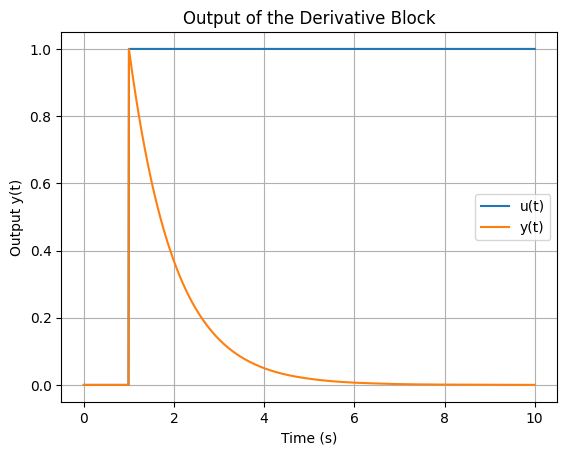

In [21]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def solve(derivative_block, t_span, u_func, K_D, T_D, t_eval):
    y0 = 0
    beta_0 = 0
    beta_1 = K_D / T_D
    alpha_0 = 1 / T_D
    x0 = [y0 - beta_1 * u_func(0)]
    sol = solve_ivp(derivative_block, t_span, x0, args=(u_func, beta_0, beta_1, alpha_0), t_eval=t_eval)
    u = np.array([u_func(t) for t in sol.t])
    y = sol.y[0] + beta_1 * u
    return sol.t, y

def derivative_block(t, x, u_func, beta_0, beta_1, alpha_0):
    u = u_func(t)
    y = x + beta_1 * u
    dxdt = beta_0 * u - alpha_0 * y
    return [dxdt]

def u_step(t):
    if t < 1:
        return 0
    else:
        return 1

K_D = 1.0
T_D = 1.0
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

t, y = solve(derivative_block, t_span, u_step, K_D, T_D, t_eval)

plt.plot(t, [u_step(_t) for _t in t], label="u(t)")
plt.plot(t, y, label="y(t)")
plt.xlabel("Time (s)")
plt.ylabel("Output y(t)")
plt.title("Output of the Derivative Block")
plt.grid(True)
plt.legend()
plt.show()

### Lead-Lag Block

-
             ┌───────────┐       
             │ 1 + T_A s │       
        u -> │ ───────── │ -> y  
             │ 1 + T_B s │       
             └───────────┘       

- In steady-state the ouput is equal to the input

- Write in form
-
             ┌───────────────────┐       
             │ 1/T_B + T_A/T_B s │       
        u -> │ ───────────────── │ -> y  
             │     1/T_B + s     │       
             └───────────────────┘       

- Hence, $\beta_0 = 1/T_B, \beta_1 = T_A / T_B, \alpha_0 = 1 / T_B, \alpha_1 = 1$
- Define single state variable x, then
$$
\frac{dx}{dt} = \beta_0 u - \alpha_0 y = \frac{1}{T_B} (u - y)
$$
$$
y = x + \beta_1 u = x + \frac{T_A}{T_B} u
$$

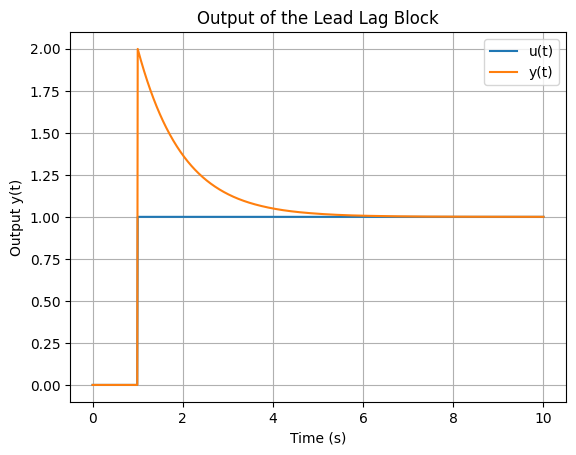

In [34]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def solve(lead_lag_block, t_span, u_func, T_A, T_B, t_eval):
    y0 = 0
    beta_0 = 1 / T_B
    beta_1 = T_A / T_B
    alpha_0 = 1 / T_B
    x0 = [y0 - beta_1 * u_func(0)]
    sol = solve_ivp(lead_lag_block, t_span, x0, args=(u_func, beta_0, beta_1, alpha_0), t_eval=t_eval)
    u = np.array([u_func(t) for t in sol.t])
    y = sol.y[0] + beta_1 * u
    return sol.t, y

def lead_lag_block(t, x, u_func, beta_0, beta_1, alpha_0):
    u = u_func(t)
    y = x + beta_1 * u
    dxdt = beta_0 * u - alpha_0 * y
    return [dxdt]

def u_step(t):
    if t < 1:
        return 0
    else:
        return 1

T_A = 2.0
T_B = 1.0
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

t, y = solve(lead_lag_block, t_span, u_step, T_A, T_B, t_eval)

plt.plot(t, [u_step(_t) for _t in t], label="u(t)")
plt.plot(t, y, label="y(t)")
plt.xlabel("Time (s)")
plt.ylabel("Output y(t)")
plt.title("Output of the Lead Lag Block")
plt.grid(True)
plt.legend()
plt.show()

### Integrator Block with Windup limit

-
                                  ___ L_max  
                                 /           
             ┌───────┐          /            
        u -> │ K_I/s │ -> v -> / -> y        
             └───────┘        /              
                             /               
                   L_min ___/                
- Equation for an integrator with u as an input and y as an output is
$$
\frac{dy}{dt} = K_I u
$$

If $L_{min} \lt v \lt L_{max}$, then $y = v$

else If $v \lt L_{min}, \text{then} y = L_{min}$

else If $v \gt L_{max}, \text{then} y = L_{max}$

### Integrator Block with Non-Windup limit

-
                        ___ L_max  
                       /           
                  ┌───────┐        
             u -> │ K_I/s │ -> y   
                  └───────┘        
                    /              
          L_min ___/               
                                      
- With a non-windup limit, the value of y is prevented from exceeding its limit, and could have different implementations

### DC Machines

- Equations are
$$
v_f = i_f R_f + L_f \frac{di_f}{dt}
$$

$$
v_a = i_a R_a + L_a \frac{di_a}{dt} + G \omega_m i_f
$$

where $f$ subscript refers to the field, the $a$ to the armature; $\omega_m$ is the machines's speed, $G$ is the constant. In a permanent magnet machine, the field flux is constant, the field equation goes away, and the field impact is embedded in a equivalent constant to $Gi_f$

### Overall Excitation System

![Lect10_2.png](./assets/Lect10_2.png)

### Separately Excited Scaled Values

$$
T_E \frac{d E_{fd}}{dt} = - (K_{E_{sep} + S_{E(E_{fd})}}) E_{fd} + V_R
$$

where $T_E$ and $K_{E{sep}}$ are the per-unit exciter self-contained coefficients, $E_{fd}$ is the exciter field voltage, $S_E(E_{fd})$ is a saturation term which depends on the field voltage, $V_R$ is the per-unit output of the voltage regulator amplifier.

### Self-Excited Exciter

- When the exciter is self-excited, the amplifier voltage appears in series with the exciter field

$$
T_E \frac{d E_{fd}}{dt} = - (K_{E_{sep} + S_{E(E_{fd})}}) E_{fd} + V_R + E_{fd}
$$

Note the additional $E_{fd}$ term on the end

- The same model can be used for both by just modifying the value of $K_E$
$$
T_E \frac{d E_{fd}}{dt} = - (K_E + S_{E(E_{fd})}) E_{fd} + V_R
$$

$$
K_{E_{self}} = K_{E_{sep}} - 1
$$

Typically, $K_{E_{self}} = -0.01$

### Voltage Regulator Model

Amplifier
$$
T_A \frac{d V_R}{dt} = - V_R + K_A V_{in}
$$
$$
V_R^{min} \le V_R \le V_R^{max}
$$

In steady state
$$
V_{ref} - V_t = V_{in} = \frac{V_R}{K_A}
$$

As $K_A$ is increased, $V_t = V_{ref}$

There is often a droop in regulation

### Feedback

- This control system can often exhibit instabilities, so some type of feedback is used

- One approach is stabilizing transformer

![Lect10_3.png](./assets/Lect10_3.png)
![Lect10_4.png](./assets/Lect10_4.png)